# Business Analytics

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
store=pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Understanding the Data

In [5]:
store.shape  #This will tell us the size of the dataset

(9994, 13)

In [6]:
store.info()  #General information of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
store.describe()   #for the mathematical statistics of all the integer or float columns.

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Cleaning the Data

In [9]:
store.isnull().sum()  #To find if there are any null values present.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
store.duplicated().sum()  #To know if there are any duplicate values present or not

17

In [11]:
store.drop_duplicates(subset=None, keep='first', inplace=True)  # Dropping the duplicate values.

In [12]:
store.duplicated().sum()

0

In [13]:
df.shape

(9994, 13)

In [14]:
#Converting this feature into category data type
df['Postal Code']= df['Postal Code'].astype('category')

## Exploratory Data Analysis

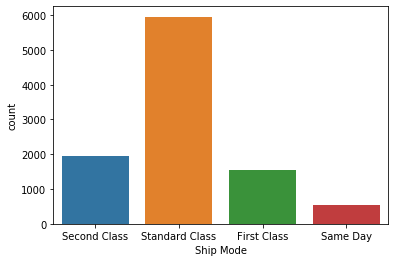

In [16]:
sns.countplot(x=store['Ship Mode'])

From the above graph, we can say that maximum Ship Mode is of "Standard Class" and minimum is of "Same Day".

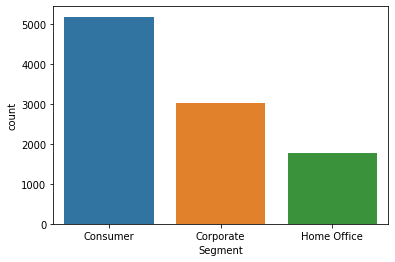

In [17]:
sns.countplot(x=store['Segment'])

We find that the max segment is of the "Consumer" and minimum is of "Home Office"

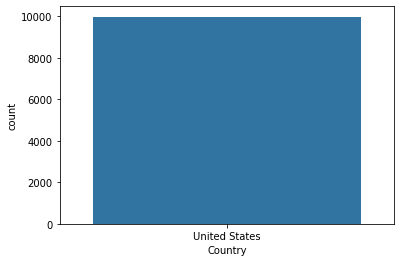

In [18]:
sns.countplot(x=store['Country'])

This shows the data contains the information only about "United States".

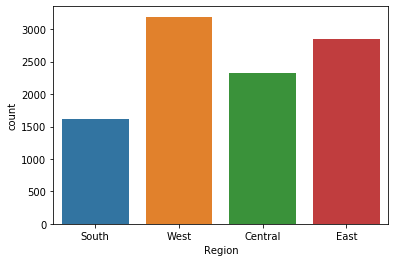

In [20]:
sns.countplot(x=store['Region'])

This shows the most of the entries are form the "West" Region of United States.

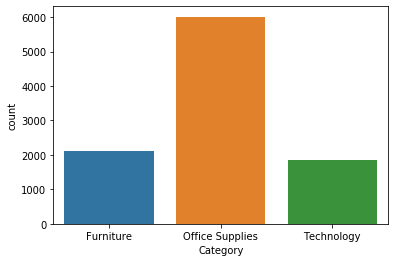

In [21]:
sns.countplot(x=store['Category'])

Most of the categories of data in the dataset are from "Office Supplies".

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

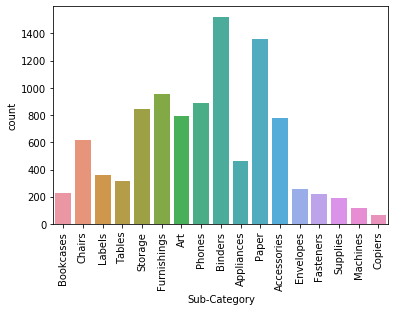

In [23]:
sns.countplot(x=store['Sub-Category'])
plt.xticks(rotation=90)

Maximum people are "Builders". Then comes "Paper" and the least number of people are "Copiers"

Maximum number of people are from "California" and "New York".

Text(0.5, 0, 'Profit')

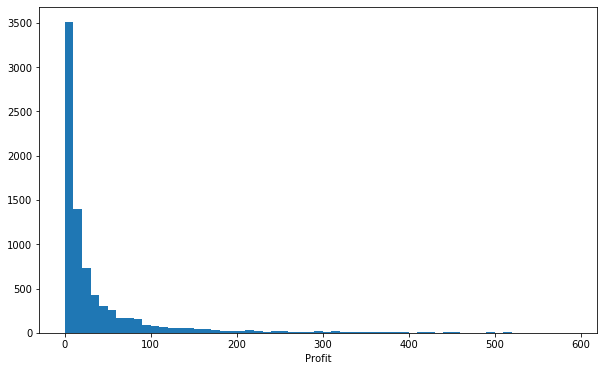

In [25]:
plt.figure(figsize=(10,6))
plt.hist(store['Profit'],bins=(np.arange(0,600,10)))
plt.xlabel("Profit")

Hence we find that maximum profit lies in the range of 0-100.

This shows that the maximum sales range from 0-400.

#### Pie Chart for finding out the major category.

Text(0.5, 1.0, 'Depicting various categories')

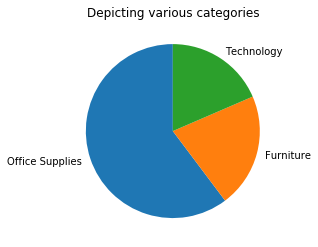

In [27]:
plt.pie(store['Category'].value_counts(),labels= store['Category'].value_counts().index, startangle=90)
plt.title("Depicting various categories")

This shows that the major category is the "Office supplies".

## Relationship analysis

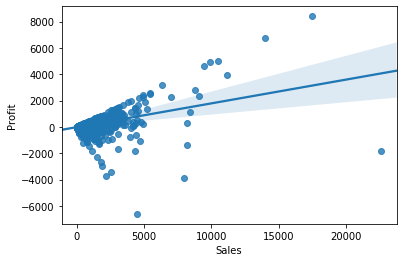

In [29]:
sns.regplot(store['Sales'],store['Profit'])

The above regression plot shows that with increase with Sales, Profit also increases somehow. Since it is not in linear relation, we can't say that both are directly proportional!!

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000


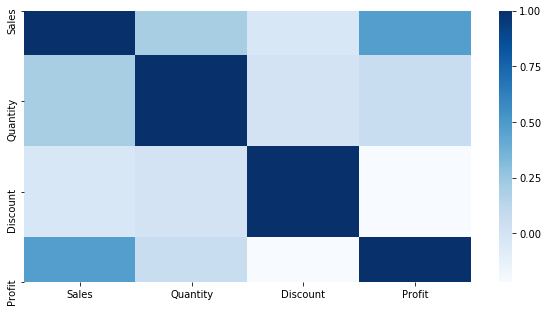

In [34]:
#Heatmap to know about the correlation between different features in the given dataset.

num_data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(10,5))
sns.heatmap(store[num_data].corr(), cmap="Blues")
corr_matrix=store.corr()
print(corr_matrix)

Hence, we come to know that the correlation between "Profit" and "Sales" is "0.4791". This shows that there is a positive realtion between them.

Correlation between "Profit" and "Discount" is "-0.2197". This means that there is a weak negative relation between both of these numeric features.